<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/technical%20indicators/intraday/technical_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#!pip install yfinance


In [13]:
import numpy as np
import pandas as pd
#import yfinance as yf
from datetime import datetime

import matplotlib.pyplot as plt

In [14]:
#one=pd.read_csv('/content/intraday.csv')
#two=pd.read_csv('/content/intraday_test.csv')

In [15]:
nifty_df = pd.read_csv('/content/updated_data.csv')
#nifty_df['Adj Close'].plot(title='Nifty stock price ($)');

In [16]:
nifty_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Cluster'], dtype='object')

In [17]:
nifty_df=nifty_df.set_index('Date')

In [18]:
rapida = 26
lenta = 52
stdv = 1.2
nifty_df['fast'] =nifty_df['Close'].rolling(window=rapida).mean() 
nifty_df['slow'] =nifty_df['Close'].rolling(window=lenta).mean()
nifty_df['bband']= nifty_df['fast']-nifty_df['slow']
nifty_df['avg'] = nifty_df['bband'].rolling(window=9).mean()
nifty_df['Sdev'] = nifty_df['bband'].rolling(window=9).std()
nifty_df['Upper Band'] = nifty_df['avg'] + (nifty_df['Sdev'] *stdv)
nifty_df['Lower Band'] = nifty_df['avg'] - (nifty_df['Sdev'] *stdv)


In [23]:
t=500

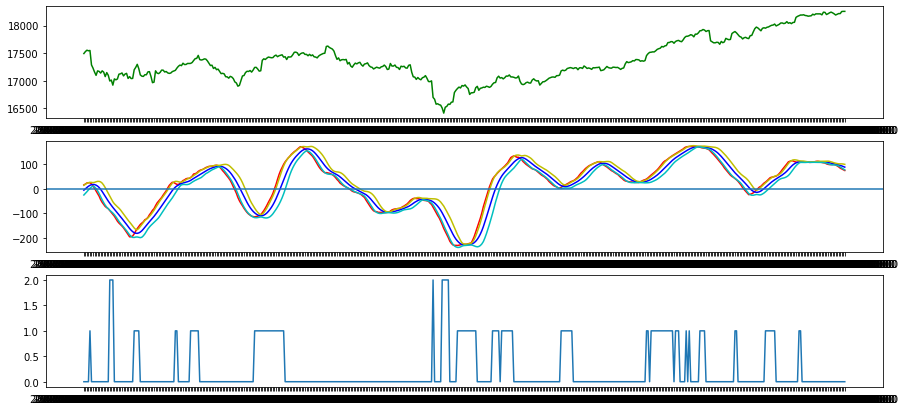

In [24]:
fig, ax = plt.subplots(3,1,figsize=(15,7))
ax[0].plot(nifty_df[['Close']][-t:],color='g')
#plt.plot(df_new['Adj Close'].values - mean, 'red', lw=1.5)
ax[1].plot(nifty_df[['bband']][-t:],color='r')
ax[1].plot(nifty_df[['avg',]][-t:],color='b')
ax[1].plot(nifty_df[['Upper Band',]][-t:],color='y')
ax[1].plot(nifty_df[['Lower Band']][-t:],color='c')
ax[1].axhline(y=0)
ax[2].plot(nifty_df['Cluster'][-t:])
plt.show()

In [ ]:
#nifty_df['Adj Close'][-1]